1. mon_standard.pkl > array code



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pickle

USE_SUBLABEL = False
URL_PER_SITE = 10
TOTAL_URLS   = 950

# Load the pickle file
print("Loading datafile...")
with open("/content/drive/MyDrive/Colab Notebooks/mon_standard.pkl", 'rb') as fi: # Path to mon_standard.pkl in Colab
    data = pickle.load(fi)


Loading datafile...


In [6]:

X1 = [] # Array to store instances (timestamps) - 19,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2 = [] # Array to store instances (direction*size) - size information
y = [] # Array to store the site of each instance - 19,000 instances, e.g., [0, 0, 0, 0, 0, 0, ..., 94, 94, 94, 94, 94]

# Differentiate instances and sites, and store them in the respective x and y arrays
# x array (direction*timestamp), y array (site label)
for i in range(TOTAL_URLS):
    if USE_SUBLABEL:
        label = i
    else:
        label = i // URL_PER_SITE # Calculate which site's URL the current URL being processed belongs to and set that value as the label. Thus, URLs fetched from the same site are labeled identically.
    for sample in data[i]:
        size_seq = []
        time_seq = []
        for c in sample:
            dr = 1 if c > 0 else -1
            time_seq.append(abs(c))
            size_seq.append(dr)   # only direction (+1, -1)
        X1.append(time_seq)
        X2.append(size_seq)
        y.append(label)
size = len(y)

print(f'Total samples: {size}') # Output: 19000

Total samples: 19000


# 1. Data analysis

There are 19000 people, and every 200 people visited the same website.<br>
For example, 0th ~ 199th people visited the website 0, and 200th ~ 399th people visited the website 1, and so on.

- number of classes: 95
- number of samples per class: 200
- total number of samples: 19000

# 2. Feature Extraction

### Number of packets (#1~#3)

In [7]:
# 같은 웹사이트를 방문한 200명의 사용자의 평균 패킷 개수
def avg_total(X2):
  avgTotal = [] # average number of packets per class (both directions)
  avgOutgoing = [] # average number of outgoing packets per class
  avgIncoming = [] # average number of incoming packets per class

  for i in range(95):
    cntTotal = 0
    cntOutgoing = 0
    cntIncoming = 0

    for j in range(200):
      cntTotal += len(X2[200*i + j])
      cntOutgoing += X2[200*i + j].count(1) * 512
      cntIncoming += X2[200*i + j].count(-1) * (-512)

    avgTotal.append(cntTotal / 200) # take the average of 200 instances of a class
    avgOutgoing.append(cntOutgoing / 200)
    avgIncoming.append(cntIncoming / 200)

  return avgTotal,avgOutgoing, avgIncoming

avgTotal,avgOutgoing, avgIncoming = avg_total(X2)


print(len(avgTotal))
print(avgTotal)
print(len(avgOutgoing))
print(avgOutgoing)
print(len(avgIncoming))
print(avgIncoming)

95
[4958.825, 2197.18, 4207.33, 4778.23, 1869.59, 3810.215, 3862.5, 1232.43, 2946.24, 5808.365, 4032.53, 6053.56, 1313.055, 4751.57, 3204.455, 1666.875, 3143.385, 5221.195, 1696.3, 8063.97, 1414.805, 6173.07, 7232.95, 1019.905, 3273.795, 996.095, 524.98, 6026.215, 2037.345, 1611.535, 1042.815, 4653.87, 4552.295, 6091.49, 8569.77, 4594.8, 3843.28, 4201.105, 2291.375, 4765.45, 3484.145, 3877.895, 7758.685, 1288.785, 1607.585, 7831.92, 5110.205, 4553.3, 8402.315, 2039.635, 5450.435, 5674.96, 5560.48, 4064.81, 3322.895, 6524.375, 1447.66, 1524.63, 1476.015, 3534.72, 3580.205, 3798.725, 6102.57, 5139.035, 6604.06, 2988.125, 9206.185, 2975.39, 5954.405, 7222.735, 530.805, 6238.395, 5040.495, 9572.77, 7187.115, 269.6, 1997.545, 5919.385, 4553.165, 8256.045, 1789.03, 3311.115, 4014.46, 1871.415, 2989.075, 4334.875, 1354.825, 5292.295, 4222.285, 6608.73, 3707.44, 5128.285, 5303.55, 1686.55, 8915.93]
95
[421.815, 207.69, 257.065, 279.36, 195.545, 394.565, 221.165, 106.18, 249.925, 366.015, 408.5

Text(0, 0.5, 'incoming packet #')

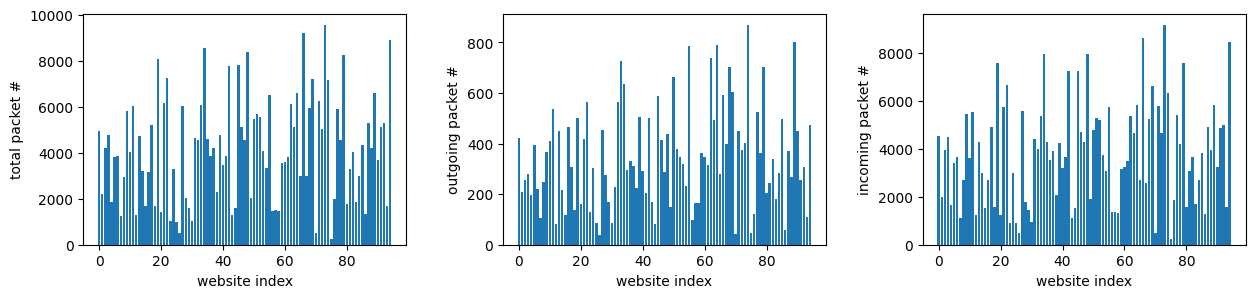

In [8]:
# plot

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,3))
plt.subplots_adjust(wspace=0.3, hspace=0)

plt.subplot(1,3,1)
plt.bar(np.arange(len(avgTotal)),avgTotal)
plt.xlabel("website index")
plt.ylabel("total packet #")

plt.subplot(1,3,2)
plt.bar(np.arange(len(avgOutgoing)),avgOutgoing)
plt.xlabel("website index")
plt.ylabel("outgoing packet #")

plt.subplot(1,3,3)
plt.bar(np.arange(len(avgIncoming)),avgIncoming)
plt.xlabel("website index")
plt.ylabel("incoming packet #")

In [9]:
# 각 사용자의 패킷 개수
def user_packet_size(X2, packet_num):
  total = [] # number of packets (both directions)
  outgoing = [] # number of outgoing packets
  incoming = [] # number of incoming packets

  for i in range(packet_num):
    total.append(len(X2[i]))
    outgoing.append(X2[i].count(1))
    incoming.append(X2[i].count(-1))

  return total, outgoing, incoming

total, outgoing, incoming = user_packet_size(X2,19000)

print(len(total))
print(total)
print(len(outgoing))
print(outgoing)
print(len(incoming))
print(incoming)

19000
[1421, 518, 1358, 1446, 1406, 559, 1376, 1403, 564, 564, 1423, 567, 563, 1443, 1452, 552, 564, 1417, 560, 1178, 629, 5072, 5021, 5221, 1036, 1019, 5183, 1028, 4895, 4950, 5051, 4961, 787, 1016, 5113, 5101, 4948, 1034, 5092, 5028, 4675, 5570, 4696, 4715, 4780, 5723, 4672, 4701, 4743, 4766, 4686, 5545, 4786, 4733, 4296, 5030, 5283, 4978, 4650, 1268, 2230, 2228, 2227, 2219, 2233, 2261, 2245, 1128, 2304, 2253, 2168, 2403, 2316, 2257, 2229, 2366, 2216, 2242, 2242, 2201, 5760, 5657, 5663, 5405, 5649, 7268, 5571, 5803, 3984, 3618, 7522, 5573, 7432, 5640, 7540, 7741, 7457, 5523, 5623, 7892, 9900, 9810, 9840, 9798, 9775, 9813, 4387, 9485, 9755, 9904, 9769, 9864, 2621, 9785, 9771, 9809, 9777, 9767, 9841, 9788, 2499, 1775, 2748, 755, 1953, 2158, 1917, 1978, 2367, 2105, 1886, 1862, 2049, 1888, 2447, 2098, 2095, 1877, 691, 696, 9962, 9961, 9964, 9962, 9962, 9963, 9964, 9963, 9963, 9941, 9963, 9963, 9963, 9964, 9963, 9964, 9962, 9962, 9967, 5556, 1805, 1843, 1902, 1842, 1890, 1948, 1810, 1795,

### Number of outgoing/incoming packets as a fraction of the total number of packets (#4~#5)

In [10]:
#이 함수는 user_packet_size() 함수 실행 후 실행해야 합니다.
def fraction_packets(total, outgoing, incoming):
  outgoingFraction = [] # number of outgoing packets as a fraction of the total number of packets
  incomingFraction = [] # number of incoming packets as a fraction of the total number of packets

  for i in range(len(total)):
    outgoingFraction.append(outgoing[i] / total[i])
    incomingFraction.append(incoming[i] / total[i])

  return outgoingFraction, incomingFraction

outgoingFraction, incomingFraction = fraction_packets(total,outgoing,incoming)

print(len(outgoingFraction))
# print(outgoingFraction)
print(len(incomingFraction))
# print(incomingFraction)

# # plot

# plt.figure(figsize=(10,3))
# plt.subplots_adjust(wspace=0.3, hspace=0)

# plt.subplot(1,2,1)
# plt.bar(np.arange(len(outgoingFraction)),outgoingFraction)
# plt.xlabel("website index")
# plt.ylabel("outgoing / total")

# plt.subplot(1,2,2)
# plt.bar(np.arange(len(incomingFraction)),incomingFraction)
# plt.xlabel("website index")
# plt.ylabel("incoming / total")

19000
[0.08515130190007038, 0.15444015444015444, 0.08689248895434462, 0.08437067773167359, 0.08179231863442389, 0.12164579606440072, 0.08357558139534883, 0.08980755523877405, 0.12411347517730496, 0.13120567375886524, 0.08222066057624737, 0.11816578483245149, 0.1261101243339254, 0.08038808038808039, 0.09366391184573003, 0.12681159420289856, 0.1276595744680851, 0.08115737473535639, 0.12142857142857143, 0.08404074702886248, 0.178060413354531, 0.31624605678233436, 0.3140808603863772, 0.31507374066270827, 0.15733590733590733, 0.1560353287536801, 0.31545437005595217, 0.14202334630350194, 0.2972420837589377, 0.29878787878787877, 0.30231637299544645, 0.3003426728482161, 0.15374841168996187, 0.14960629921259844, 0.3017797770389204, 0.28935502842579885, 0.2991107518189167, 0.16247582205029013, 0.30832678711704636, 0.3124502784407319, 0.09283422459893048, 0.08007181328545782, 0.09518739352640546, 0.09098621420996819, 0.09121338912133892, 0.08090162502184169, 0.0920376712328767, 0.0861518825781748

### the total number of incoming/outgoing packets in the first 30 packets. (#6~#7)

In [11]:
def first30_packets(X2, packet_num):
  outgoing30 = [] # number of outgoing packets
  incoming30 = [] # number of incoming packets

  for i in range(packet_num):
    cntOutgoing30 = 0
    cntIncoming30 = 0

    for j in range(30):
      if X2[i][j] == -1:
        cntOutgoing30 += 1
      else:
        cntIncoming30 += 1

    outgoing30.append(cntOutgoing30)
    incoming30.append(cntIncoming30)

  return outgoing30,incoming30

outgoing30, incoming30 = first30_packets(X2, 19000)

print(len(outgoing30))
print(outgoing30)
print(len(incoming30))
print(incoming30)

19000
[21, 22, 23, 21, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 22, 22, 21, 20, 21, 21, 21, 21, 21, 20, 21, 21, 21, 20, 21, 22, 22, 21, 20, 20, 21, 20, 22, 22, 22, 22, 23, 22, 22, 22, 23, 21, 21, 22, 22, 22, 23, 22, 22, 21, 22, 22, 22, 22, 22, 22, 21, 22, 22, 21, 23, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 22, 21, 21, 22, 23, 22, 23, 23, 23, 22, 21, 22, 23, 22, 22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22, 22, 22, 23, 22, 24, 22, 22, 23, 21, 22, 23, 22, 22, 22, 22, 22, 22, 23, 22, 22, 22, 23, 21, 22, 22, 22, 22, 21, 21, 22, 23, 23, 22, 22, 22, 23, 22, 22, 22, 21, 22, 23, 23, 22, 21, 22, 22, 21, 21, 22, 22, 22, 22, 24, 22, 22, 22, 23, 21, 22, 23, 23, 22, 23, 22, 23, 22, 22, 22, 22, 21, 23, 21, 21, 22, 22, 22, 21, 21, 22, 22, 23, 22, 22, 22, 22, 22, 23, 23, 21, 22, 22, 21, 22, 22, 18, 19, 18, 18, 18, 18, 18, 18, 18, 19, 18, 18, 18, 18, 18, 18, 19, 18, 19, 18, 22, 21, 22, 22, 21, 22, 21, 20, 22, 22, 22, 21, 22, 22, 21, 21, 21, 22, 21, 20, 19, 18, 18, 19, 18, 19, 18, 18, 1

### calSTA : 배열에 대한 평균, 표준편차, 최댓값, 최솟값 배열 리턴

In [ ]:
import numpy as np

def calSTA(array):
  array_sta = [[] for i in range(len(array))]  #순서대로 평균, 표준편차, 최댓값, 최솟값

  for i in range(len(array)):
    array_sta[i].append(np.mean(array[i]))
    array_sta[i].append(np.std(array[i]))
    array_sta[i].append(np.max(array[i]))
    array_sta[i].append(np.min(array[i]))

  return array_sta

### The sequence of bursts (+ 평균, 표준편차, 최댓값, 최솟값)



In [12]:
# the sequence of bursts
def seq_burst(X2,packet_num):
  bursts = [[] for i in range(packet_num)]

  for i in range(packet_num):
    index = 0
    size = X2[i][0] * 512 # 512 or -512
    for j in range(1, len(X2[i])):
      if X2[i][j-1] != X2[i][j]: # direction change
        bursts[i].append((j-index)*size)
        index = j
        size = X2[i][j] * 512
    bursts[i].append((len(X2[i]) - index) * size)

  bursts_sta = calSTA(bursts)

  return bursts_sta

bursts_sta = seq_burst(X2,19000)
# for i in range(19000):
#   print(bursts_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[-4658.196078431372, 8413.17421857776, 3072, -26112]
[-5731.90243902439, 9690.938890316444, 5120, -26624]
[-1513.7391304347825, 3257.3973769065246, 3584, -9216]
[-4806.530612244898, 9027.628113247893, 4096, -25600]
[-5120.0, 8792.937359281897, 3072, -27648]
[-5108.869565217391, 9434.466687557859, 5632, -35328]
[-5313.422222222222, 9669.00934024414, 3584, -31232]
[-4383.438596491228, 8372.477935028875, 4096, -27136]
[-5501.023255813953, 9539.160553697931, 4608, -35840]
[-4578.461538461538, 9079.55804257678, 3584, -25600]
[-5097.739130434783, 9292.333320573618, 5120, -26112]
[-4869.446808510638, 9152.155497322512, 3584, -31744]
[-5165.511111111111, 9055.839154004992, 5632, -26624]
[-4828.862745098039, 9425.695520224735, 3584, -25600]
[-4648.156862745098, 7831.334705496358, 6144, -27136]
[-4685.2830188679245, 9195.258491810931, 5120, -25600]
[-5213.090909090909, 8949.20341253948, 6144, -25600]
[-4678.274509803921, 8620.641248334574, 3584, -30720]
[-3719

### Sequence of cumulative packet sizes

In [13]:
# sequence of cumulative packet sizes
# RAM 초과 에러 발생

# cumulative = [[] for i in range(19000)]

# for i in range(19000):
#   sum = 0
#   for j in range(len(X2[i])):
#     sum += X2[i][j]
#     cumulative[i].append(sum)

# print(cumulative[0])
# plt.plot(cumulative[0])



```
# 코드로 형식 지정됨
```

### Time interval (both directions, outgoing, incoming)

In [14]:
# time interval (both directions, outgoing, incoming)
# RAM 초과 에러 발생

# interval = [[] for i in range(19000)]

# for i in range(19000):
#   for j in range(1, len(X1[i])):
#     interval[i].append(X1[i][j] - X1[i][j-1])

# print(interval[0])

### Number of packets in fixed time (#8) (+ 평균, 표준편차, 최댓값, 최솟값)

In [15]:
import numpy as np
#1초 간격
def packet_in_fixed_time(X1,packet_num, time_interval):
  packets_in_fixed_time = [[] for i in range(packet_num)]

  for i in range(packet_num):
    start_time = X1[i][0]
    end_time = start_time + time_interval
    a=0
    for timestamp in X1[i]:
      if timestamp <= end_time:
        a+=1
      else:
        packets_in_fixed_time[i].append(a)
        a = 1
        start_time = end_time
        end_time += time_interval
    packets_in_fixed_time[i].append(a)

  packets_in_fixed_time_sta = calSTA(packets_in_fixed_time)
  
  return packets_in_fixed_time_sta

packets_in_fixed_time_sta = packet_in_fixed_time(X1,19000,1.0)

# for i in range(19000):
#   print(packets_in_fixed_time_sta[i])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[91.0, 163.26256970495922, 455, 1]
[109.8, 178.6263138510113, 466, 5]
[3.2941176470588234, 5.8235294117647065, 31, 1]
[109.6, 123.36060959641858, 321, 1]
[110.0, 183.55598600971857, 476, 5]
[69.875, 153.54350971304518, 474, 1]
[91.83333333333333, 122.734695809928, 345, 1]
[83.71428571428571, 154.45916176472414, 457, 1]
[109.2, 181.95098241009856, 472, 5]
[37.666666666666664, 36.01789678602693, 117, 1]
[92.33333333333333, 157.14289321788908, 440, 1]
[76.71428571428571, 104.91998895173718, 300, 4]
[136.5, 119.68813642128445, 265, 14]
[81.85714285714286, 115.1935372336841, 304, 1]
[94.5, 138.59743864877157, 390, 1]
[38.86666666666667, 99.11062281892671, 391, 1]
[60.0, 139.5484782352634, 452, 1]
[109.6, 184.4370895454599, 478, 1]
[105.0, 133.12525430335648, 375, 1]
[90.66666666666667, 171.570847044466, 473, 1]
[192.66666666666666, 223.0953956395236, 508, 26]
[2.8095238095238093, 3.4173095462874574, 13, 1]
[194.33333333333334, 143.32790687402397, 372, 21]

###sum of Intervals of continuous packets ((+ 평균, 표준편차, 최댓값, 최솟값))

In [16]:
def sum_interval(X1, X2, packet_num):
  sum_intervals_continuous = [[] for i in range(packet_num)]

  for i in range(packet_num):
    start_pack=X2[i][0]
    start_time=X1[i][0]
    end_time=X1[i][0]

    for j in range(1,len(X1[i])):
      if start_pack == X2[i][j]: #512 or -512
        end_time=X1[i][j]
        continue
      else:
        end_time=X1[i][j]
        sum_intervals_continuous[i].append(round(end_time-start_time,3))
        start_time=end_time
    sum_intervals_continuous[i].append(round(end_time-start_time,3))

  sum_intervals_continuous_sta = calSTA(sum_intervals_continuous)
  return sum_intervals_continuous, sum_intervals_continuous_sta

sum_intervals_continuous,sum_intervals_continuous_sta=sum_interval(X1,X2,19000)
# for i in range(19000):
#   print(sum_intervals_continuous_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0.13738095238095238, 0.3643001086480729, 2.35, 0.0]
[0.09130434782608694, 0.1814986967931675, 0.96, 0.0]
[1.4369565217391302, 2.269982636942997, 7.58, 0.0]
[0.09244444444444445, 0.1828193468433987, 0.92, 0.0]
[0.1051219512195122, 0.20849193645540456, 1.07, 0.0]
[1.127058823529412, 7.4165975218061675, 53.56, 0.0]
[0.1241860465116279, 0.32032855631577195, 1.7, 0.0]
[0.13720000000000002, 0.3935125919205127, 2.51, 0.0]
[0.1002325581395349, 0.19591750010385567, 0.84, 0.0]
[1.1245098039215686, 6.314562787009117, 45.72, 0.0]
[0.10612244897959185, 0.23738211963105627, 1.39, 0.0]
[0.1376086956521739, 0.24574805747039505, 1.34, 0.0]
[0.07872340425531915, 0.11159609962826136, 0.41, 0.0]
[0.14510638297872339, 0.4029247981174415, 2.45, 0.0]
[0.09490566037735848, 0.24612178793488, 1.48, 0.0]
[0.298, 1.250174387835553, 8.9, 0.0]
[0.1902127659574468, 0.7721770532327142, 5.36, 0.0]
[0.10666666666666666, 0.31052694589517366, 2.0, 0.0]
[0.07971014492753624, 0.19574436

###time interval of incoming and outgoing packets

In [17]:
#sum_intervals_continuous,sum_intervals_continuous_sta=sum_interval(X1,X2,19000) <- 이 함수를 반드시 실행 후 진행해주세요!
def time_interval_of_inandout(X1,X2,packet_num):
  # sum_intervals_continuous,sum_intervals_continuous_sta=sum_interval(X1,X2,packet_num)

  outgoing_packs=[[] for i in range(packet_num)]
  incoming_packs=[[] for i in range(packet_num)]

  for i in range(packet_num):
    for j in range(len(sum_intervals_continuous[i])):
      if j%2==0:
        outgoing_packs[i].append(sum_intervals_continuous[i][j])
      else:
        incoming_packs[i].append(sum_intervals_continuous[i][j])

  outgoing_packs_sta = calSTA(outgoing_packs)
  incoming_packs_sta = calSTA(incoming_packs)

  return outgoing_packs_sta,incoming_packs_sta

outgoing_packs_sta,incoming_packs_sta=time_interval_of_inandout(X1,X2,19000)

# for i in range(19000):
#   print(outgoing_packs_sta[i], incoming_packs_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0.19714285714285712, 0.49404205389866174, 2.35, 0.0] [0.07761904761904762, 0.11919990260082157, 0.44, 0.0]
[0.07956521739130436, 0.11246171371199931, 0.42, 0.0] [0.10304347826086957, 0.23013105496100894, 0.96, 0.0]
[1.8591666666666666, 2.59781465316951, 7.58, 0.0] [0.9763636363636364, 1.7335841628218625, 5.46, 0.0]
[0.08869565217391305, 0.16154967866494993, 0.74, 0.0] [0.09636363636363635, 0.20260901565118097, 0.92, 0.0]
[0.12952380952380954, 0.23049586692867577, 1.07, 0.0] [0.07950000000000002, 0.17901047455386515, 0.79, 0.0]
[0.09115384615384615, 0.14031083414161144, 0.49, 0.0] [2.2044, 10.48403131624472, 53.56, 0.0]
[0.13818181818181818, 0.34706085874010834, 1.7, 0.0] [0.10952380952380954, 0.2889632731726134, 1.33, 0.0]
[0.076, 0.09431860898041276, 0.3, 0.0] [0.1984, 0.5415878876045881, 2.51, 0.0]
[0.12590909090909094, 0.20746651626684443, 0.76, 0.0] [0.07333333333333333, 0.17913371790059204, 0.84, 0.0]
[0.23923076923076922, 0.30312377615198555, 

###flow activity duration

In [18]:
def activity_dur(X1,packet_num):
  flow_act_duration=[0]*(packet_num)

  for i in range(packet_num):
    flow_act_duration[i]=X1[i][-1]
  return flow_act_duration

flow_act_duration=activity_dur(X1,19000)

# for i in range(19000):
#   print(flow_act_duration[i])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5.77
4.2
33.05
4.16
4.31
57.48
5.34
6.86
4.31
57.35
5.2
6.33
3.7
6.82
5.03
14.9
8.94
4.48
5.5
5.21
2.77
20.48
2.87
5.28
4.9
5.43
3.86
7.66
4.93
6.37
3.91
3.89
4.94
56.99
4.92
6.2
6.42
5.14
56.62
7.17
5.65
3.92
4.18
5.31
8.92
4.48
7.61
4.74
4.18
7.09
3.7
10.78
5.98
6.23
4.84
5.54
5.9
3.99
10.46
61.57
6.72
5.69
5.59
4.5
5.37
4.03
5.13
5.33
55.38
4.61
5.11
6.01
5.2
11.17
4.0
5.41
5.39
5.33
66.59
7.9
6.28
4.78
13.37
7.24
4.97
5.23
5.66
4.98
6.31
5.24
3.3
10.1
4.56
4.54
3.42
5.53
6.48
6.87
56.59
9.93
3.84
5.98
6.0
3.92
3.58
8.85
5.02
56.5
5.95
5.28
2.63
4.42
2.93
5.21
3.7
5.29
6.78
7.66
3.78
4.77
6.64
8.98
6.29
4.82
2.65
4.6
4.55
9.7
4.87
8.36
50.35
3.73
10.68
4.86
14.84
5.5
6.69
4.7
10.4
13.04
5.38
4.29
5.33
3.05
4.5
4.63
4.64
6.12
3.29
9.43
7.62
12.89
11.05
5.33
9.62
55.96
4.23
6.94
9.22
63.35
5.29
6.15
5.11
5.71
2.41
4.87
4.46
28.19
5.34
8.4
4.15
5.79
10.84
6.21
5.2
5.9
27.28
7.35
8.1
6.01
8.06
6.41
6.28
4.21
4.24
55.03
6.4
5.71
5.84
4.77
4.38
12.44
3.

2. unmon_standard10.pkl > array code

In [19]:
import pickle

TOTAL_URLS = 10000  # total number in the dataset

# Load 10,000 unmon pickle file
print("Loading datafile...")
with open('/content/drive/MyDrive/Colab Notebooks/unmon_standard10.pkl', 'rb') as f:  # Path to unmon_standard10.pkl in Colab
    x = pickle.load(f)

size = len(x)
print(f'Total samples: {size}')

X1 = [] # Array to store instances (timestamps) - 10,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2 = [] # Array to store instances (direction*size) - size information

for i in range(TOTAL_URLS):
    size_seq = []
    time_seq = []
    for c in x[i]:
        dr = 1 if c > 0 else -1
        time_seq.append(abs(c))
        size_seq.append(dr * 512) # In the pickle file, there is no size information, so the conversion code is set to multiply by 512 uniformly.
    X1.append(time_seq)
    X2.append(size_seq)

print(len(X1)) # Print the length of X1



Loading datafile...
Total samples: 10000
10000


In [20]:
#이건 unmonitored 라서 적용 안되는 것 같습니다.!
# avgTotal,avgOutgoing, avgIncoming=avg_total(X2)
# print(len(avgTotal))
# print(avgTotal)
# print(len(avgOutgoing))
# print(avgOutgoing)
# print(len(avgIncoming))
# print(avgIncoming)

IndexError: ignored

In [21]:
total, outgoing, incoming=user_packet_size(X2,10000)
print(len(total))
print(total)
print(len(outgoing))
print(outgoing)
print(len(incoming))
print(incoming)

10000
[130, 9927, 359, 9948, 2508, 5430, 1328, 4463, 4470, 9971, 9981, 9410, 1519, 9956, 6935, 1054, 3706, 9948, 597, 55, 4820, 3663, 4872, 304, 6096, 3235, 94, 5061, 9956, 3140, 166, 441, 348, 486, 4356, 1110, 7959, 7103, 2672, 8943, 9974, 9845, 3111, 9952, 57, 3447, 2584, 9464, 9848, 382, 7153, 7815, 4311, 4822, 9950, 1214, 9976, 3863, 9989, 2509, 9977, 7571, 3058, 4375, 9984, 7487, 1688, 79, 4413, 3756, 9985, 2049, 5331, 4420, 8069, 9894, 5434, 4112, 86, 1784, 6124, 361, 9961, 9954, 5112, 390, 6702, 129, 1488, 9967, 5140, 9984, 1841, 3425, 8193, 780, 6637, 373, 7746, 2797, 1610, 547, 1022, 8137, 2968, 3299, 7723, 9980, 87, 3133, 125, 8494, 6627, 1449, 1985, 4513, 7224, 3311, 5258, 9971, 963, 160, 6927, 3539, 9969, 80, 3579, 8010, 8761, 199, 161, 572, 5020, 9928, 235, 5451, 1519, 2236, 100, 1232, 1479, 9964, 6112, 1883, 363, 4027, 3219, 9924, 2979, 488, 2069, 4414, 4631, 5020, 4199, 457, 9958, 3925, 2976, 9965, 2200, 1504, 5378, 6227, 441, 9951, 5005, 1887, 3572, 9975, 2420, 7783, 29

In [22]:
outgoingFraction, incomingFraction=fraction_packets(total,outgoing,incoming)

print(len(outgoingFraction))
print(outgoingFraction)
print(len(incomingFraction))
print(incomingFraction)

10000
[0.2230769230769231, 0.0743427017225748, 0.20612813370473537, 0.05438279051065541, 0.11682615629984051, 0.04438305709023941, 0.05271084337349398, 0.043468518933452834, 0.07225950782997763, 0.04292448099488517, 0.036369101292455665, 0.08097768331562168, 0.10138248847926268, 0.0663921253515468, 0.0585436193222783, 0.1347248576850095, 0.058014031300593634, 0.055991154000804184, 0.135678391959799, 0.21818181818181817, 0.07240663900414938, 0.04777504777504778, 0.06958128078817734, 0.18421052631578946, 0.08218503937007875, 0.06924265842349304, 0.24468085106382978, 0.04208654416123296, 0.0547408597830454, 0.07356687898089172, 0.18072289156626506, 0.17913832199546487, 0.19540229885057472, 0.13991769547325103, 0.06198347107438017, 0.08108108108108109, 0.060937303681367, 0.04181331831620442, 0.10666167664670659, 0.051884155205188416, 0.04391417685983557, 0.13285931945149823, 0.10028929604628736, 0.06079180064308682, 0.3684210526315789, 0.14737452857557296, 0.05572755417956656, 0.0933009298

In [23]:
outgoing30,incoming30=first30_packets(X2,10000)

print(len(outgoing30))
print(outgoing30)
print(len(incoming30))
print(incoming30)

10000
[17, 18, 17, 21, 27, 27, 18, 19, 20, 17, 20, 22, 26, 21, 21, 21, 20, 25, 18, 22, 21, 20, 22, 18, 20, 20, 19, 18, 20, 21, 18, 19, 18, 24, 16, 17, 19, 20, 16, 22, 21, 21, 22, 20, 19, 16, 20, 16, 20, 21, 20, 19, 21, 22, 21, 19, 24, 22, 19, 17, 20, 16, 22, 21, 21, 19, 25, 21, 19, 21, 19, 22, 20, 27, 21, 19, 27, 19, 17, 19, 24, 16, 16, 22, 20, 27, 22, 19, 20, 21, 19, 17, 21, 19, 21, 20, 19, 17, 21, 19, 21, 20, 20, 20, 16, 22, 21, 21, 21, 18, 21, 20, 21, 27, 20, 20, 21, 19, 25, 19, 21, 18, 17, 16, 21, 21, 21, 20, 22, 21, 22, 16, 19, 20, 18, 22, 27, 27, 18, 19, 20, 27, 27, 22, 20, 21, 22, 19, 20, 19, 20, 22, 21, 22, 21, 19, 26, 21, 18, 25, 19, 22, 20, 21, 18, 21, 19, 16, 16, 17, 17, 20, 17, 25, 19, 26, 17, 20, 22, 22, 26, 20, 20, 18, 25, 21, 20, 21, 20, 21, 21, 22, 20, 20, 21, 27, 21, 17, 20, 17, 16, 20, 21, 18, 27, 17, 25, 19, 21, 22, 20, 22, 19, 20, 20, 16, 20, 27, 18, 22, 21, 20, 17, 17, 21, 17, 21, 20, 26, 20, 21, 17, 17, 19, 20, 22, 22, 20, 20, 19, 27, 19, 20, 22, 19, 20, 22, 20, 2

In [25]:
bursts_sta=seq_burst(X2,10000)
for i in range(10000):
  print(bursts_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[-3672.2758620689656, 7659.287397094411, 7680, -33792]
[-7121.8809160305345, 10588.55335538641, 27648, -43520]
[-4991.820979020979, 8160.750184312021, 3584, -46592]
[-7069.924585218703, 9960.943033265457, 16896, -41984]
[-2615.00826446281, 6354.026245527895, 4096, -28160]
[-5400.0, 9642.967178208168, 3072, -31232]
[-4491.286021505376, 10523.88157865873, 68608, -38912]
[-5792.610051993068, 9451.400035054978, 11264, -45568]
[-6477.974965229485, 10336.44614636899, 6656, -50688]
[-6197.083612040134, 10063.638675332986, 44032, -33792]
[-1251.5555555555557, 3929.865338691253, 3072, -14848]
[-4288.919337016575, 8437.19699383809, 17408, -51712]
[-5592.838526912181, 9477.356623341471, 22528, -36864]
[-3705.0673712021135, 7644.01649227463, 8192, -43008]
[-4376.587570621469, 8333.23154838155, 14848, -26624]
[-5165.969040247678, 9017.04853988036, 6656, -41472]
[-4009.405582922824, 8111.037147446648, 8704, -44032]
[-2736.551724137931, 6838.791293954448, 3584, -32

In [26]:
packets_in_fixed_time_sta=packet_in_fixed_time(X1,10000,1.0)

for i in range(10000):
  print(packets_in_fixed_time_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[133.71428571428572, 244.8379722450364, 952, 1]
[997.3, 1164.2424189145488, 3006, 2]
[370.6190476190476, 239.5208463321395, 725, 5]
[831.4166666666666, 691.5455466240495, 1587, 3]
[114.13333333333334, 132.92296850264654, 400, 2]
[126.16666666666667, 250.72057266119103, 686, 1]
[111.0, 399.9051302590993, 2597, 1]
[389.6842105263158, 577.039910380335, 1889, 1]
[906.6363636363636, 1143.1361386138392, 4199, 1]
[206.55, 331.79624395101285, 970, 1]
[2.0, 5.462792808001955, 35, 1]
[317.7741935483871, 235.39160366496196, 689, 1]
[298.4, 395.61948047755857, 1273, 1]
[158.17777777777778, 431.75390567049703, 2466, 1]
[50.916666666666664, 172.81949076677918, 955, 1]
[143.65384615384616, 432.0804716990444, 2142, 1]
[134.2888888888889, 176.40340412717188, 657, 1]
[65.44444444444444, 107.36036006636829, 361, 1]
[202.47058823529412, 490.78138389919286, 2456, 1]
[827.5, 689.0277570606281, 2043, 3]
[155.80555555555554, 345.22374543704285, 1621, 1]
[154.76923076923077,

In [27]:
sum_intervals_continuous,sum_intervals_continuous_sta=sum_interval(X1,X2,10000)
for i in range(10000):
  print(sum_intervals_continuous_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0.06507177033492824, 0.29598609759351235, 3.84, 0.0]
[0.021203703703703704, 0.08092883925597608, 1.02, 0.0]
[0.05100737100737101, 0.09499368888757417, 1.02, 0.0]
[0.02910194174757282, 0.0850466422350284, 0.87, 0.0]
[0.05933054393305439, 0.12343908915874306, 1.17, 0.0]
[0.21214285714285713, 0.6491002406785715, 4.14, 0.0]
[0.058194905869324486, 0.30207103096479837, 2.01, 0.0]
[0.04546697038724374, 0.1845494376114761, 3.28, 0.0]
[0.023211845102505693, 0.08621596153672856, 1.49, 0.0]
[0.08400778210116731, 0.3951671664417507, 4.96, 0.0]
[2.2152941176470584, 7.316559073649354, 31.1, 0.0]
[0.02647887323943662, 0.1268001209795186, 3.02, 0.0]
[0.07189710610932476, 0.5219625983181865, 8.72, 0.0]
[0.06451887941534715, 0.5617531013195264, 10.33, 0.0]
[0.242111801242236, 1.9890246712346193, 25.02, 0.0]
[0.17723849372384937, 1.7610962939345098, 27.11, 0.0]
[0.07948275862068964, 0.4525191232564278, 8.54, 0.0]
[0.14015873015873015, 0.2432745660509466, 1.5, 0.0]
[0.

In [28]:
outgoing_packs_sta,incoming_packs_sta=time_interval_of_inandout(X1,X2,10000)

for i in range(10000):
  print(outgoing_packs_sta[i], incoming_packs_sta[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0.07571428571428572, 0.3781908239496668, 3.84, 0.0] [0.05432692307692308, 0.17726970121105187, 1.44, 0.0]
[0.019305555555555555, 0.06836028714118084, 0.73, 0.0] [0.023101851851851853, 0.09175303404155039, 1.02, 0.0]
[0.05455882352941177, 0.08330961311776454, 0.48, 0.0] [0.04743842364532021, 0.10531837681082458, 1.02, 0.0]
[0.03305825242718447, 0.09512315218905902, 0.77, 0.0] [0.025145631067961163, 0.07339035250041884, 0.87, 0.0]
[0.052083333333333336, 0.10621437311190776, 0.8, 0.0] [0.06663865546218489, 0.13827434252193316, 1.17, 0.0]
[0.2876190476190476, 0.8770888251803438, 4.14, 0.0] [0.13666666666666666, 0.24896611613656786, 0.95, 0.0]
[0.05451327433628318, 0.2915081053547376, 2.01, 0.0] [0.06188470066518846, 0.3122555736045129, 2.01, 0.0]
[0.05031818181818182, 0.23202152846109236, 3.28, 0.0] [0.04059360730593608, 0.11893405622790708, 1.36, 0.0]
[0.020863636363636362, 0.056806526077191846, 0.59, 0.0] [0.02557077625570776, 0.10792360846772232, 1.4

In [29]:
flow_act_duration=activity_dur(X1,10000)

for i in range(10000):
  print(flow_act_duration[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
13.6
9.16
20.76
11.99
14.18
8.91
52.55
19.96
10.19
21.59
37.66
30.08
22.36
52.97
38.98
42.36
50.71
8.83
45.08
11.14
54.46
13.0
28.99
9.87
36.59
21.46
9.71
14.49
39.23
30.38
13.48
45.31
4.86
40.67
8.84
11.44
34.33
16.5
50.12
49.94
28.06
47.08
52.3
14.2
4.57
10.71
5.0
10.19
13.59
12.08
45.08
43.84
52.61
6.68
20.7
33.37
6.26
12.47
10.76
4.49
24.55
13.41
11.22
35.68
14.28
19.49
17.91
42.29
32.01
12.43
10.59
9.68
14.71
20.05
14.51
24.23
11.63
28.32
8.71
29.64
47.84
29.25
16.7
11.27
31.1
34.43
50.91
12.09
23.06
19.16
47.49
46.44
11.36
51.46
24.93
52.46
10.01
24.97
38.58
10.97
40.33
16.51
47.1
13.44
9.79
28.03
12.29
53.12
12.5
15.97
20.75
6.38
27.9
51.78
48.97
9.15
36.41
35.26
50.33
10.88
10.95
14.35
9.12
49.22
35.62
42.45
5.09
16.05
34.4
47.02
9.4
10.42
7.99
5.94
50.89
16.26
16.13
13.75
3.54
11.65
54.34
18.93
16.85
18.83
11.26
39.11
49.45
7.82
53.93
34.62
13.96
35.89
7.25
12.61
16.54
7.82
22.25
31.9
12.93
8.99
35.95
16.83
50.13
6.86
53.41
20.47
48.33
53.59